In [1]:
import my_funcs as mf

In [31]:
import pandas as pd
import verde as vd
import numpy as np
import geopandas as gpd
import rioxarray as rio
import pyproj


import matplotlib.pyplot as plt

gdb = '/home/ggrl/geodatabase/'

In [32]:
%matplotlib inline

In [3]:
# Lendo cama vertorial gerada no QGIS com poligonos de 6º x 4º [Folhas em escala de 1:1.000.000]
malha_cartog_1kk = gpd.read_file(gdb+'cartografia/malha_cartog_1kk_wgs84.shp')
malha_cartog_1kk.head(5)

,id,left,top,right,bottom,geometry
0,4.0,-78.0,-4.0,-72.0,-8.0,"POLYGON ((-78.00000 -4.00000, -72.00000 -4.000..."
1,5.0,-78.0,-8.0,-72.0,-12.0,"POLYGON ((-78.00000 -8.00000, -72.00000 -8.000..."
2,13.0,-72.0,4.0,-66.0,0.0,"POLYGON ((-72.00000 4.00000, -66.00000 4.00000..."
3,14.0,-72.0,0.0,-66.0,-4.0,"POLYGON ((-72.00000 0.00000, -66.00000 0.00000..."
4,15.0,-72.0,-4.0,-66.0,-8.0,"POLYGON ((-72.00000 -4.00000, -66.00000 -4.000..."


In [4]:
# Criando coluna Region [W,E,S,N]

bounds = malha_cartog_1kk.bounds
malha_cartog_1kk['region'] = [(left,right,bottom,top) for left,right,bottom,top in zip(bounds['minx'],bounds['maxx'],
                                                                                       bounds['miny'],bounds['maxy'])]

In [5]:
# Indexando as folhas 1kk com função 'nomeador_grid()' descrita em './my_funcs.py' importado como 'mf'

df = pd.DataFrame(malha_cartog_1kk)
lista_grid = []
for index, row in df.iterrows():
    row['id_folha'] = (mf.nomeador_grid(row.region[0],row.region[1],   
                                        row.region[3],row.region[2]))
    lista_grid.append(row.id_folha)

malha_cartog_1kk['id_folha'] = lista_grid

In [6]:
malha_cartog_1kk.head(5)

,id,left,top,right,bottom,geometry,region,id_folha
0,4.0,-78.0,-4.0,-72.0,-8.0,"POLYGON ((-78.00000 -4.00000, -72.00000 -4.000...","(-78.0, -72.0, -8.0, -4.0)",SB18
1,5.0,-78.0,-8.0,-72.0,-12.0,"POLYGON ((-78.00000 -8.00000, -72.00000 -8.000...","(-78.0, -72.0, -12.0, -8.0)",SC18
2,13.0,-72.0,4.0,-66.0,0.0,"POLYGON ((-72.00000 4.00000, -66.00000 4.00000...","(-72.0, -66.0, 0.0, 4.0)",NA19
3,14.0,-72.0,0.0,-66.0,-4.0,"POLYGON ((-72.00000 0.00000, -66.00000 0.00000...","(-72.0, -66.0, -4.0, 0.0)",SA19
4,15.0,-72.0,-4.0,-66.0,-8.0,"POLYGON ((-72.00000 -4.00000, -66.00000 -4.000...","(-72.0, -66.0, -8.0, -4.0)",SB19


In [7]:
malha_cartog_1kk.drop(['id','left','right','bottom','top','region'],axis=1,inplace=True)

In [8]:
malha_cartog_1kk.to_file(gdb+'database.gpkg',driver='GPKG',layer='malha_cartog_1kk_wgs84')

In [12]:
malha_cartog_1kk.head()

,geometry,id_folha
0,"POLYGON ((-78.00000 -4.00000, -72.00000 -4.000...",SB18
1,"POLYGON ((-78.00000 -8.00000, -72.00000 -8.000...",SC18
2,"POLYGON ((-72.00000 4.00000, -66.00000 4.00000...",NA19
3,"POLYGON ((-72.00000 0.00000, -66.00000 0.00000...",SA19
4,"POLYGON ((-72.00000 -4.00000, -66.00000 -4.000...",SB19


In [26]:
malha_cartog_1kk['geometry_utm23s'] = malha_cartog_1kk.to_crs("EPSG:32723")['geometry']

In [28]:
malha_cartog_1kk.set_geometry(malha_cartog_1kk.geometry_utm23s)

,geometry,id_folha,geometry_utm23s
0,"POLYGON ((-3383522.194 9472437.966, -2614266.1...",SB18,"POLYGON ((-3383522.194 9472437.966, -2614266.1..."
1,"POLYGON ((-3347774.547 8947000.610, -2587856.0...",SC18,"POLYGON ((-3347774.547 8947000.610, -2587856.0..."
2,"POLYGON ((-2614266.129 10496434.658, -1884960....",NA19,"POLYGON ((-2614266.129 10496434.658, -1884960...."
3,"POLYGON ((-2623105.690 10000000.000, -1891310....",SA19,"POLYGON ((-2623105.690 10000000.000, -1891310...."
4,"POLYGON ((-2614266.129 9503565.342, -1884960.1...",SB19,"POLYGON ((-2614266.129 9503565.342, -1884960.1..."
5,"POLYGON ((-2587856.067 9008342.173, -1865965.9...",SC19,"POLYGON ((-2587856.067 9008342.173, -1865965.9..."
6,"POLYGON ((-1865965.975 10946771.355, -1171560....",NB20,"POLYGON ((-1865965.975 10946771.355, -1171560...."
7,"POLYGON ((-1884960.189 10473703.630, -1184377....",NA20,"POLYGON ((-1884960.189 10473703.630, -1184377...."
8,"POLYGON ((-1891310.540 10000000.000, -1188659....",SA20,"POLYGON ((-1891310.540 10000000.000, -1188659...."
9,"POLYGON ((-1884960.189 9526296.370, -1184377.5...",SB20,"POLYGON ((-1884960.189 9526296.370, -1184377.5..."


<AxesSubplot:>

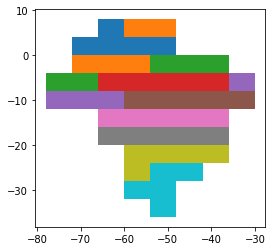

In [34]:
malha_cartog_1kk.plot('id_folha')

In [10]:
# Definindo Regions (W,E,S,N)
def regions(gdf):
    bounds = gdf.bounds 
    gdf['region'] = [(left,right,bottom,top) for left,right,bottom,top in zip(bounds['minx'],bounds['maxx'],
                                                                                bounds['miny'],bounds['maxy'])]

# Definindo nomes a partir da articulação sistematica de folhas de cartas. Construindo uma lista e definindo como uma series.
def nomeador_malha(gdf):
    df = pd.DataFrame(gdf)
    lista_grid = []
    for index, row in df.iterrows():
        row['id_folha'] = (mf.nomeador_grid(row.region[0],row.region[1],
                                            row.region[3],row.region[2],escala=5))
        lista_grid.append(row.id_folha)

    gdf['id_folha'] = lista_grid

In [11]:
malha_cartog_25k = gpd.read_file(gdb+'cartografia/malha_cartog_25k_wgs84.shp')   # Escala de 1:25.000
malha_cartog_50k = gpd.read_file(gdb+'cartografia/malha_cartog_50k_wgs84.shp')   # Escala de 1:50.000
malha_cartog_100k = gpd.read_file(gdb+'cartografia/malha_cartog_100k_wgs84.shp') # Escala de 1:100.000

regions(malha_cartog_25k)
regions(malha_cartog_50k)
regions(malha_cartog_100k)

nomeador_malha(malha_cartog_25k)
nomeador_malha(malha_cartog_50k)
nomeador_malha(malha_cartog_100k)

# Percebe-se que há redundância no código, o que leva ao excesso de informação ser escrita/lida e processada.

In [13]:
malha_cartog_50k.drop(['id','left','right','bottom','top','region'],axis=1,inplace=True)
malha_cartog_25k.drop(['id','left','right','bottom','top','region'],axis=1,inplace=True)
malha_cartog_100k.drop(['id','left','right','bottom','top','region'],axis=1,inplace=True)

In [14]:
malha_cartog_50k.to_file(gdb+'database.gpkg',driver='GPKG',layer='malha_cartog_50k_wgs84')
malha_cartog_25k.to_file(gdb+'database.gpkg',driver='GPKG',layer='malha_cartog_25k_wgs84')
malha_cartog_100k.to_file(gdb+'database.gpkg',driver='GPKG',layer='malha_cartog_100k_wgs84')

In [15]:
malha_cartog_25k.head(3)

,geometry,id_folha
0,"POLYGON ((-72.87500 -8.37500, -72.75000 -8.375...",SC18_X_B_II_3_SE
1,"POLYGON ((-72.87500 -8.25000, -72.75000 -8.250...",SC18_X_B_II_3_NE
2,"POLYGON ((-72.75000 -8.37500, -72.62500 -8.375...",SC18_X_B_II_4_SW


In [15]:
#g_1105 = pd.read_csv(gdb+'geof/g1105')
#geof_1039 = pd.read_csv(gdb+'geof/geof_1039')
#g_1089 = pd.read_csv(gdb+'geof/g1089')
g_3022 = pd.read_csv(gdb+'geof/g3022.csv')

In [16]:
# Filtro a partir do ID da folha cartográfica
SF23_V_D_25k = malha_cartog_25k[malha_cartog_25k['id_folha'].str.contains("SF23_V_D")]
SF23_V_D_25k

,geometry,id_folha
10117,"POLYGON ((-46.50000 -21.50000, -46.37500 -21.5...",SF23_V_D_IV_1_NW
10120,"POLYGON ((-46.50000 -21.00000, -46.37500 -21.0...",SF23_V_D_I_1_NW
10123,"POLYGON ((-46.25000 -21.25000, -46.12500 -21.2...",SF23_V_D_I_4_NW
10124,"POLYGON ((-46.25000 -21.37500, -46.12500 -21.3...",SF23_V_D_I_4_SW
10125,"POLYGON ((-46.12500 -21.37500, -46.00000 -21.3...",SF23_V_D_I_4_SE
...,...,...
37148,"POLYGON ((-46.25000 -21.87500, -46.12500 -21.8...",SF23_V_D_IV_4_SW
37151,"POLYGON ((-46.37500 -21.87500, -46.25000 -21.8...",SF23_V_D_IV_3_SE
37631,"POLYGON ((-45.12500 -21.00000, -45.00000 -21.0...",SF23_V_D_III_2_NE
37632,"POLYGON ((-45.12500 -21.12500, -45.00000 -21.1...",SF23_V_D_III_2_SE


In [17]:
regions(SF23_V_D_25k)

/home/ggrl/Softwares/anaconda3/envs/mappingBot/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [33]:
SF23_V_D_25k.plot('id_folha')

NameError: name 'SF23_V_D_25k' is not defined

In [22]:
df = SF23_V_D_25k
df

,geometry,id_folha,region
10117,"POLYGON ((-46.50000 -21.50000, -46.37500 -21.5...",SF23_V_D_IV_1_NW,"(-46.5, -46.375, -21.625, -21.5)"
10120,"POLYGON ((-46.50000 -21.00000, -46.37500 -21.0...",SF23_V_D_I_1_NW,"(-46.5, -46.375, -21.125, -21.0)"
10123,"POLYGON ((-46.25000 -21.25000, -46.12500 -21.2...",SF23_V_D_I_4_NW,"(-46.25, -46.125, -21.375, -21.25)"
10124,"POLYGON ((-46.25000 -21.37500, -46.12500 -21.3...",SF23_V_D_I_4_SW,"(-46.25, -46.125, -21.5, -21.375)"
10125,"POLYGON ((-46.12500 -21.37500, -46.00000 -21.3...",SF23_V_D_I_4_SE,"(-46.125, -46.0, -21.5, -21.375)"
...,...,...,...
37148,"POLYGON ((-46.25000 -21.87500, -46.12500 -21.8...",SF23_V_D_IV_4_SW,"(-46.25, -46.125, -22.0, -21.875)"
37151,"POLYGON ((-46.37500 -21.87500, -46.25000 -21.8...",SF23_V_D_IV_3_SE,"(-46.375, -46.25, -22.0, -21.875)"
37631,"POLYGON ((-45.12500 -21.00000, -45.00000 -21.0...",SF23_V_D_III_2_NE,"(-45.125, -45.0, -21.125, -21.0)"
37632,"POLYGON ((-45.12500 -21.12500, -45.00000 -21.1...",SF23_V_D_III_2_SE,"(-45.125, -45.0, -21.25, -21.125)"


In [23]:
def select_area(escala,id):
    malha_cartog = mf.importar('malha_cartog_'+escala+'_wgs84')
    regions(malha_cartog)
    area = pd.DataFrame(malha_cartog[malha_cartog['id_folha'].str.contains(id)])
    return(area)

In [24]:
area = select_area('25k','SF23_V_D_VI')

In [29]:
# Iterando entre as regions da malha cartográfica
def interpolar(area,geof,degree=1,spacing=499,psize=100,n_splits=15,validate=False,chan_list=['CTCOR','eU','eTh','MDT','KPERC']):
    grids = {chan_list[0]:(),chan_list[1]:(),chan_list[2]:(),chan_list[3]:(), chan_list[4]:()}    # Dicionário para salvar os dados interpolados (grids)
    scores = {chan_list[0]:(),chan_list[1]:(),chan_list[2]:(), chan_list[3]:(), chan_list[4]:()}   # Dicionário para salvar os dados da validação cruzada
    chain_list = chain_list       
    for index, row in area.iterrows():
        print(row.id_folha+' start')
        data = geof[vd.inside((geof.LONGITUDE, geof.LATITUDE), region = row.region)]
        coordinates = (data.X.values, data.Y.values)
        if data.empty == True:  # if data dont have values pass to next step
            print('none')
        if len(data) < 2000:    # if less then 2000 points pass to next step
            print('few data')
        else:
            # Iterando entre os canais de interpolação
            for i in chan_list:
                print(i)
                chain = vd.Chain([
                    ('trend', vd.Trend(degree=degree)),
                    ('reduce', vd.BlockReduce(np.median, spacing=spacing)),
                    ('spline', vd.Spline())
                ])
                
                chain.fit(coordinates, data[i])
                
                if validate == True:
                    cv     = vd.BlockKFold(spacing=spacing,
                                n_splits=n_splits,
                                shuffle=True)

                    scores[i] = vd.cross_val_score(chain,
                                            coordinates,
                                            data[i],
                                            cv=cv)
                    

                grid = chain.grid(spacing=psize, data_names=[i],pixel_register=True)
                grids[i] = vd.distance_mask(coordinates, maxdist=499, grid= grid)
                tif_ = grids[i].rename(easting = 'x',northing='y')
                tif_.rio.to_raster('/home/ggrl/Desktop/grids/3022/100m_25k/'+i+'_'+row.id_folha+'.tif')

In [30]:
SF23_V_D_VI_100m = interpolar(area,g_3022)

SF23_V_D_VI start
CTCOR


/home/ggrl/Softwares/anaconda3/envs/mappingBot/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 10005. The TBB threading layer is disabled.
  warnings.warn(problem)


eU
eTh
MDT
KPERC


In [35]:
SF23_V_D_VI_100m.grids['MDT'].MDT.plot()
plt.axis('scaled')

AttributeError: 'NoneType' object has no attribute 'grids'

In [31]:
plt.figure()
grids['MDT'].MDT.plot(cmap='terrain')
plt.axis('scaled')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'grids' is not defined

In [ ]:
interpolar(df,gLine_1105,validate=True)